(482, 20)
(482, 21)


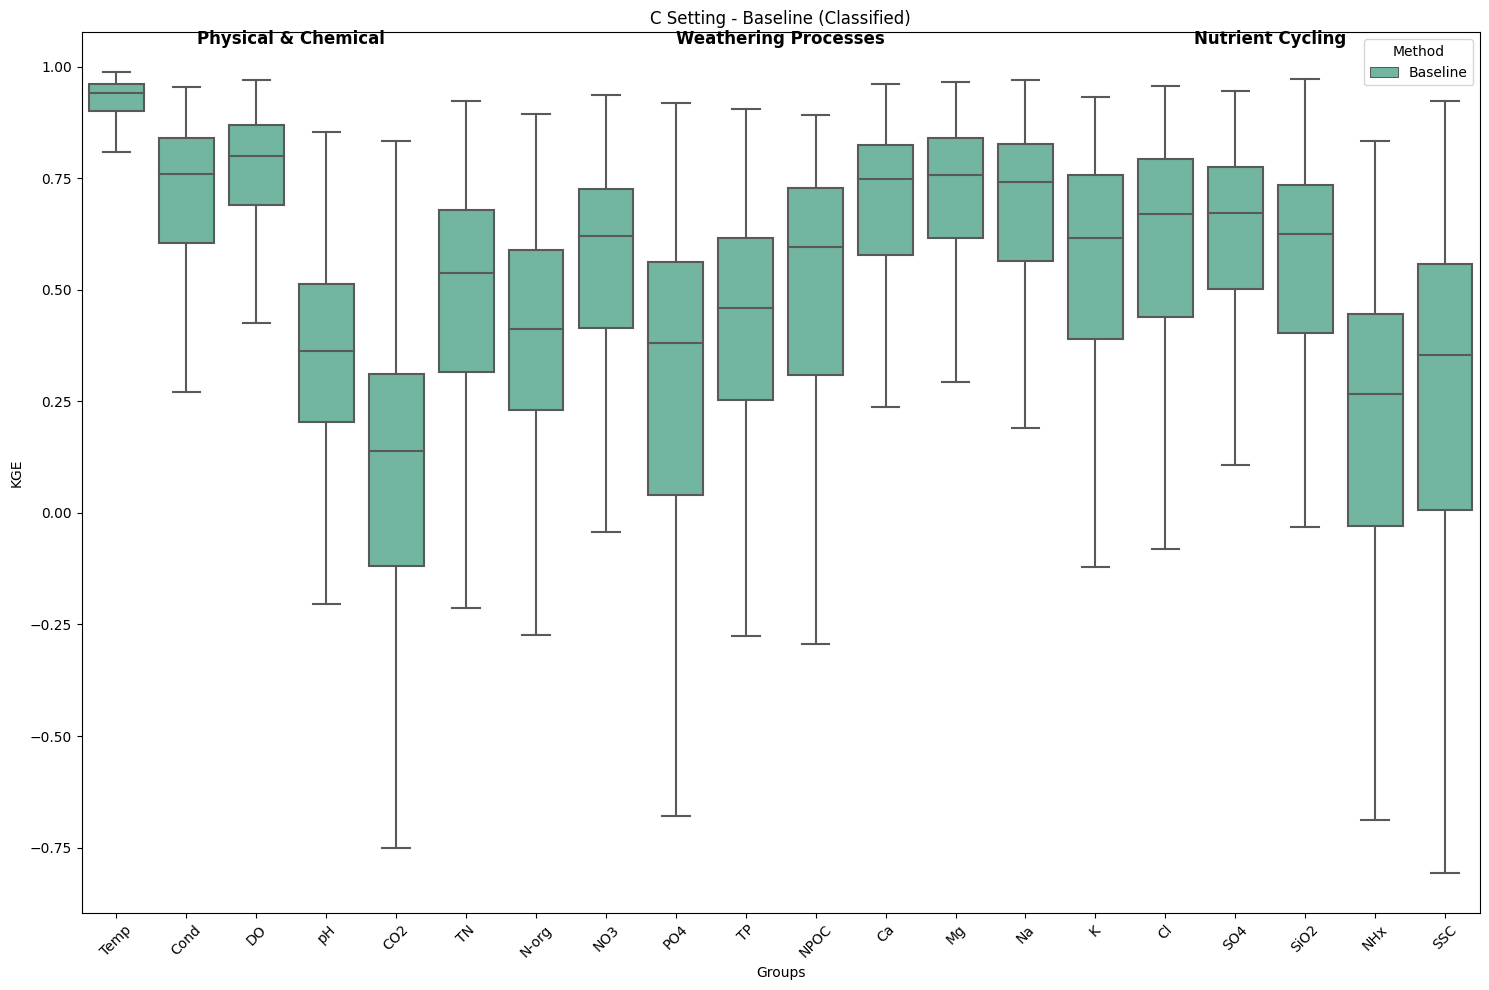

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# 读取 CSV 文件为 DataFrame
df1 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/metric/metrics.csv").values
df2 = pd.read_csv("unified_ablation_lstm_logminmax_y/baseline_dropout_0.3/models/lstm/1016_145644/predictions/monte_carlo/aggregated_metrics.csv").values

# 提取需要的列
cols1 = df1[:, [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58]]
cols2 = df2[:, [2, 11, 20, 29, 38, 47, 56, 65, 74, 83, 92, 101, 110, 119, 128, 137, 146, 155, 164, 173]]


# 转换为 numpy 数组
df1 = pd.DataFrame(cols1, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df1['Dataset'] = 'Baseline'
# 合并两个DataFrame
df_combined = pd.concat([df1])
print(df_combined.shape)
# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图


df2 = pd.DataFrame(cols2, columns=['Temp', 'Cond', 'DO', 'pH', 'CO2', 'TN', 'N-org', 'NO3', 'PO4', 'TP', 
                                   'NPOC', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'SiO2', 'NHx', 'SSC'])
df2['Dataset'] = 'Monte Carlo'

# 转为长格式
df2_melted = pd.melt(df2, id_vars=['Dataset'], var_name='Group', value_name='Value')
df2_melted = df2_melted.dropna()
categories = ['Physical & Chemical'] * 5 + ['Weathering Processes'] * 8 + ['Nutrient Cycling'] * 7
group_positions = [2.5, 9.5, 16.5]  # 每个组的中心位置
group_labels = ['Physical & Chemical', 'Weathering Processes', 'Nutrient Cycling']

# 绘制 df1 的 boxplot，并分类
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False, palette="Set2")
ax.set_title('C Setting - Baseline (Classified)')
ax.set_xlabel('Groups')
ax.set_ylabel('KGE')

# 添加分类标题
for pos, label in zip(group_positions, group_labels):
    plt.text(pos, 1.05, label, horizontalalignment='center', fontsize=12, fontweight='bold', transform=ax.transData)

plt.xticks(rotation=45)
plt.legend(title='Method')
plt.tight_layout()
plt.show()

# 绘制 df2 的 boxplot，并分类

/tmp/ipykernel_56747/2831063990.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


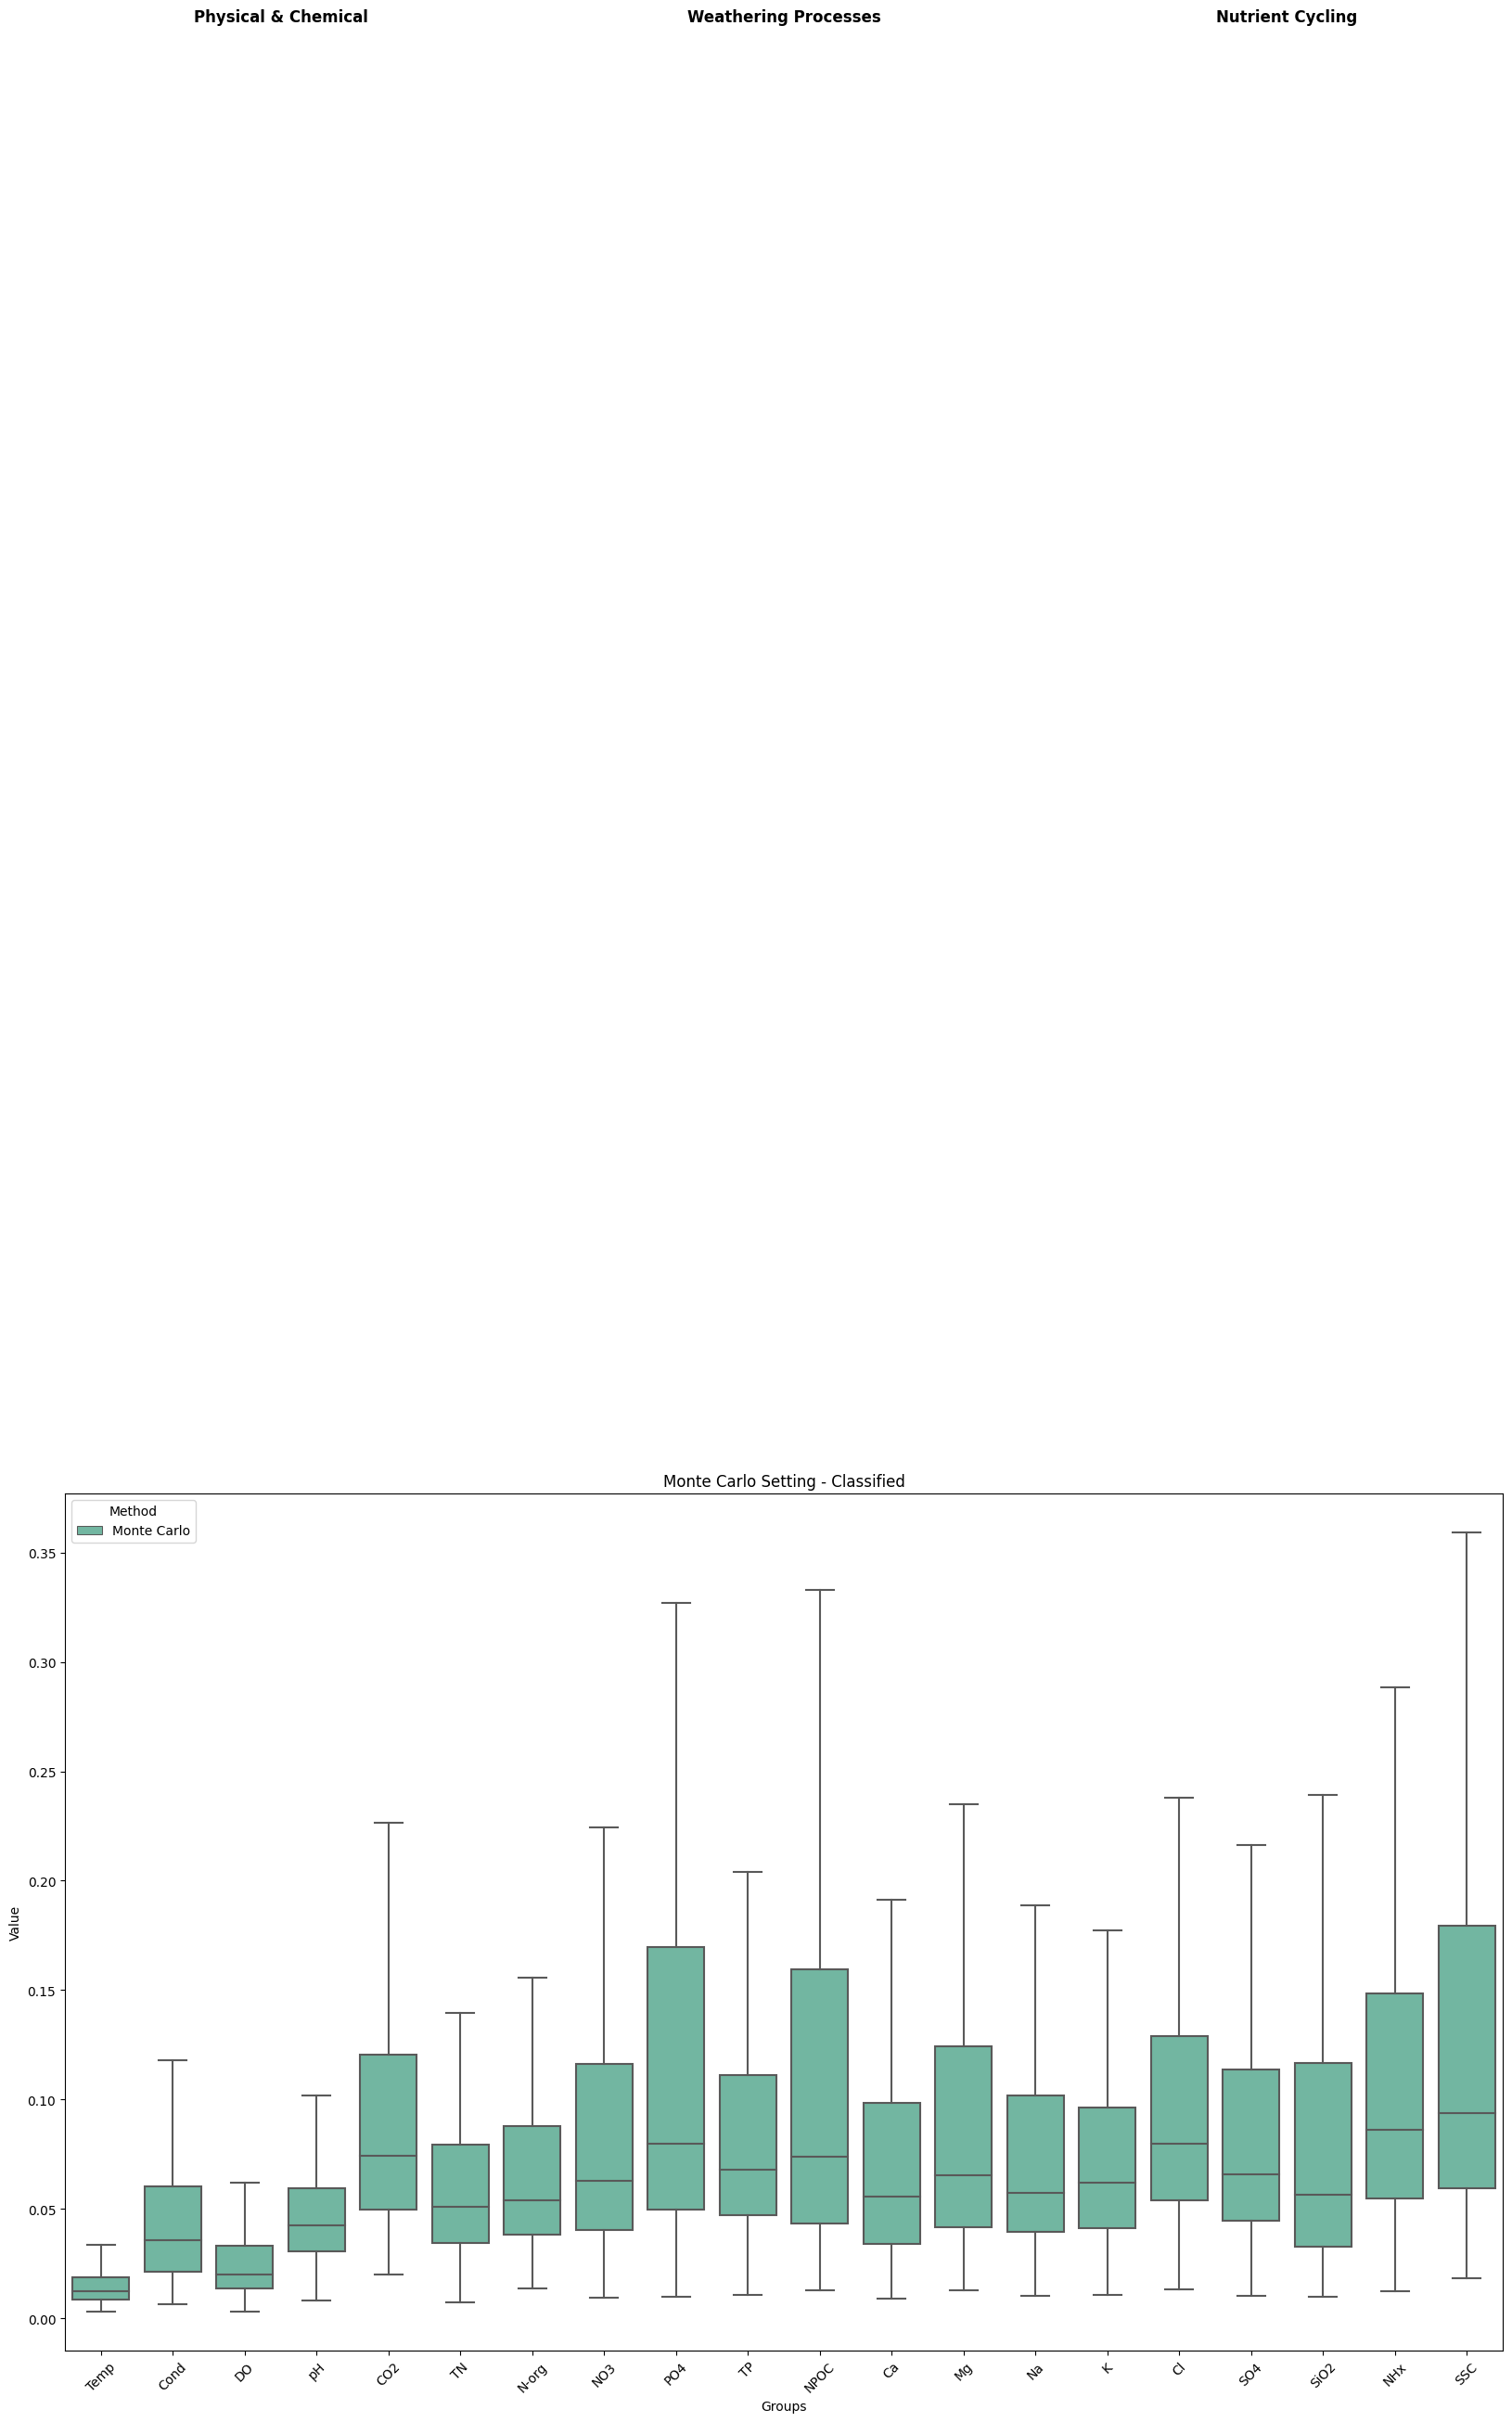

In [6]:
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df2_melted, showfliers=False, palette="Set2")
ax.set_title('Monte Carlo Setting - Classified')
ax.set_xlabel('Groups')
ax.set_ylabel('Value')

# 添加分类标题
for pos, label in zip(group_positions, group_labels):
    plt.text(pos, 1.05, label, horizontalalignment='center', fontsize=12, fontweight='bold', transform=ax.transData)

plt.xticks(rotation=45)
plt.legend(title='Method')
plt.tight_layout()
plt.show()

Cols1 Median: [0.94185942 0.75936383 0.79970264 0.36388075 0.13817006 0.53862393
 0.41220194 0.61978224 0.38077575 0.45970657 0.59677684 0.74878997
 0.75818276 0.74268132 0.61630213 0.66964102 0.6723232  0.62454447
 0.26627266 0.35381615]
Cols2 Median: [0.01238115 0.03575551 0.01993798 0.0425938  0.07413895 0.05107503
 0.05398325 0.06286968 0.07961708 0.06778673 0.07369149 0.05571248
 0.06546263 0.05710607 0.0619706  0.0798878  0.06579506 0.05652355
 0.0861378  0.09361875]
Pearson Correlation: -0.62


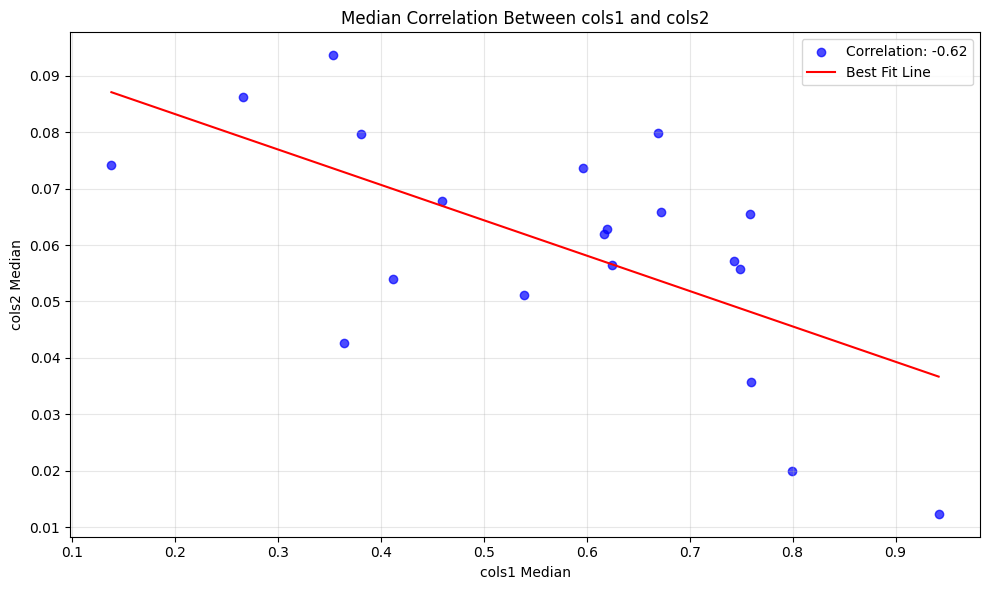

In [ ]:
from scipy.stats import pearsonr
from numpy.polynomial.polynomial import Polynomial

cols1_median = np.nanmedian(cols1, axis=0)
cols2_median = np.nanmedian(cols2, axis=0)

# 计算中位数的相关性 (Pearson Correlation)
correlation, _ = pearsonr(cols1_median, cols2_median)

# 拟合最佳直线
p = Polynomial.fit(cols1_median, cols2_median, deg=1)
fit_line_x = np.linspace(min(cols1_median), max(cols1_median), 100)
fit_line_y = p(fit_line_x)

# 打印结果
print("KGE Performance Median:", cols1_median)
print("Uncertainty Median:", cols2_median)
print(f"Pearson Correlation: {correlation:.2f}")

# 绘制散点图和拟合最佳红线
plt.figure(figsize=(10, 6))
plt.scatter(cols1_median, cols2_median, color='blue', alpha=0.7, label=f'Correlation: {correlation:.2f}')
plt.plot(fit_line_x, fit_line_y, color='red', linestyle='-', label='Best Fit Line')
plt.title('Median Correlation Between cols1 and cols2')
plt.xlabel('cols1 Median')
plt.ylabel('cols2 Median')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()